<a href="https://colab.research.google.com/github/zachaa/Galaxy_Morphology_Classification/blob/main/visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
drive.mount("/Colab_Notebooks")
%load_ext sql

In [2]:
# load from SQLite database
connection = sqlite3.connect("/content/galaxy_data.sqlite")
df_data = pd.read_sql("SELECT * from galaxy_data", connection)
connection.close()

df_data.head()

,objid,sample,asset_id,dr7objid,ra,dec,gz2_class,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_debiased,t01_smooth_or_features_a03_star_or_artifact_debiased,...,t10_arms_winding_a28_tight_debiased,t10_arms_winding_a29_medium_debiased,t10_arms_winding_a30_loose_debiased,t11_arms_number_a31_1_debiased,t11_arms_number_a32_2_debiased,t11_arms_number_a33_3_debiased,t11_arms_number_a34_4_debiased,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_debiased,class_reduced
0,587722981741363294,original,3,587722981741363294,182.925262,-1.092357,Sb,0.459,0.681,0.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sb
1,587722981741363323,original,4,587722981741363323,182.970108,-1.219537,Sc?l,0.216,0.736,0.000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Sc?l
2,587722981741559888,original,5,587722981741559888,183.438095,-1.238414,Er,0.773,0.029,0.114,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Er
3,587722981741625481,original,6,587722981741625481,183.473999,-1.231429,Sc1t,0.152,0.639,0.009,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sc1t
4,587722981741625484,original,7,587722981741625484,183.477783,-1.084604,Sb,0.182,0.720,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sb


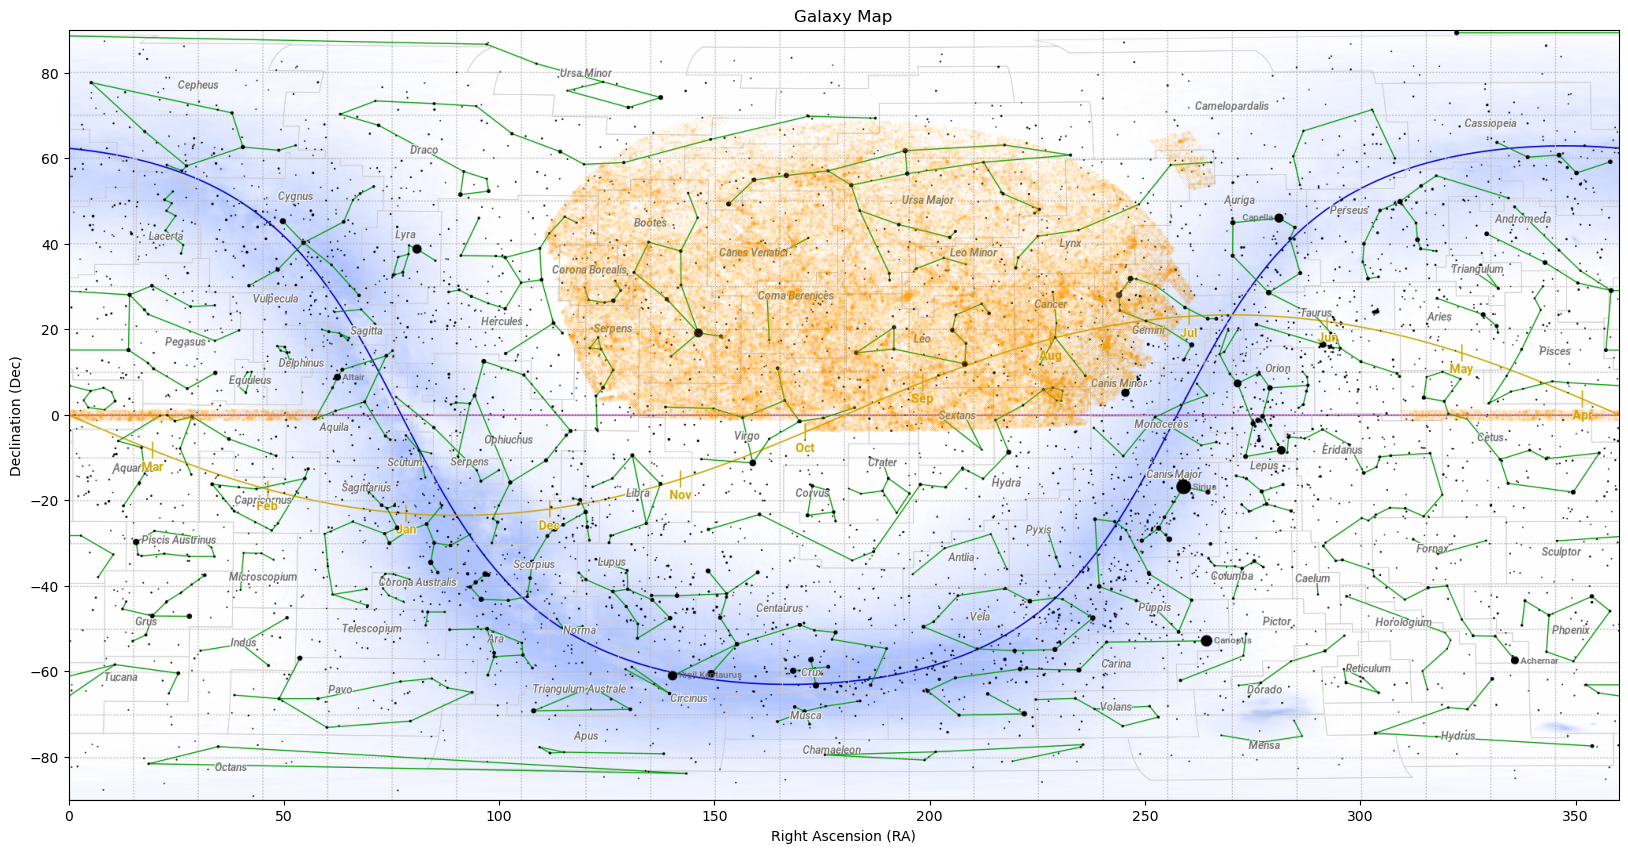

In [6]:
# Create a constellation map with superimposed data

plt.figure(figsize=(20, 10))

ra = df_data['ra']
dec = df_data['dec']

# Create a scatter plot of galaxy positions
plt.scatter(ra, dec, s= 0.002, alpha=0.8, color='orange')

# Overlay the image on the plot
img = plt.imread("/content/constellations_cropped.png")
plt.imshow(img, extent=[0, 360, -90, 90], aspect='auto')

plt.xlabel('Right Ascension (RA)')
plt.ylabel('Declination (Dec)')
plt.title('Galaxy Map')

plt.show()